<a href="https://colab.research.google.com/github/DANIEL-BONFIM/KNN-otimizado-ML/blob/main/KNN-otimiza%C3%A7%C3%A3o%20de%20hiperparametro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

*   Biblioteca de 'Aprendizado de Máquina' (*'Machine Learning'*) para Python.
*   A estrutura do Scikit-Learn é por meio vários componentes, a partir dos quais se importam as bibliotecas relevantes àquele componente.




In [ ]:
import sklearn
# Importação de TODAS as bibliotecas que serão utilizadas

# Gerais 
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.model_selection import train_test_split
# Conjunto Treino/Teste

# Normalização
from sklearn.preprocessing import StandardScaler
# Transformação de dados categóricos para numéricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Técnica (KNN para Regressão)
from sklearn.neighbors import KNeighborsRegressor

# Otimização dos hiperparâmetro
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Cálculo do MAE e MSE/RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Leitura do arquivo 'FA084-1s2021-TCH_Met-Simplificado.csv'

In [ ]:
df = pd.read_csv('/content/FA084-1s2021-TCH_Met-Simplificado.csv')
df.head()

,std_iii,stn_iii,std_ii,stn_ii,std_i,stn_i,ppt_i,ppt_ii,ppt_iii,n_corte,variedade,solo,tch
0,298.137966,290.416957,300.976112,294.107103,304.568648,292.414836,288.5,940.9,127.5,4,RB855536,LP,56.05
1,297.840941,289.507766,301.333143,292.572111,306.173441,294.018183,330.8,530.8,331.1,3,RB855453,LP,64.79
2,296.500074,289.742133,301.217074,293.460700,306.526324,294.885094,501.6,796.4,396.2,2,SP813250,LP,40.60
3,301.707662,290.776908,306.802273,294.288120,304.628874,289.654484,105.1,1540.9,97.5,3,RB867515,LP,83.49
4,301.467413,291.229271,305.546310,292.364105,298.294019,289.612832,443.9,599.8,479.2,2,RB867515,LP,54.56


# Perguntas


## Qual a dimensão do conjunto de dados (linhas, colunas)?

In [ ]:
# Dimensão
df.shape

(2000, 13)

In [ ]:
# Nomes das colunas
df.columns

Index(['std_iii', 'stn_iii', 'std_ii', 'stn_ii', 'std_i', 'stn_i', 'ppt_i',
       'ppt_ii', 'ppt_iii', 'n_corte', 'variedade', 'solo', 'tch'],
      dtype='object')

In [ ]:
# Descrição dos tipos das variáveis
df.dtypes

std_iii      float64
stn_iii      float64
std_ii       float64
stn_ii       float64
std_i        float64
stn_i        float64
ppt_i        float64
ppt_ii       float64
ppt_iii      float64
n_corte        int64
variedade     object
solo          object
tch          float64
dtype: object

## Média das temperaturas (diurnas e noturnas)

### Qual a média das temperaturas diurnas por fase de crescimento (i, ii e iii) em °C?  



In [ ]:
# Período i: 
df.std_i.mean()-273

32.20240421276617

In [ ]:
# Período ii:
df.std_ii.mean()-273

30.62745761190814

In [ ]:
# Período iii:
df.std_iii.mean()-273

28.454780538101602

### Qual a média das temperaturas noturnas por fase de crescimento (i, ii e iii) em °C?  



In [ ]:
# Período i: 
df.stn_i.mean()-273

17.91401291741721

In [ ]:
# Período ii:

df.stn_ii.mean()-273

19.69845500068442

In [ ]:
# Período iii:

df.stn_iii.mean()-273

17.95821989889157

### Qual a **MÉDIA GERAL** das temperaturas diurnas (em °C) independentemente da fase de crescimento?

### E das temperaturas noturnas (em °C)?


In [ ]:
# Média geral das temperaturas diurnas
(df.std_i.sum()+df.std_ii.sum()+df.std_iii.sum())/(3*len(df))-273

30.428214120925418

In [ ]:
# Média geral das temperaturas noturnas
(df.stn_i.sum()+df.stn_ii.sum()+df.stn_iii.sum())/(3*len(df))-273

18.52356260566404

#### Em quais períodos (i, ii ou iii) a temperatura média diurna foi maior do que a média geral?

#### E para a temperatura noturna?

## Produtividade (tch) em t/ha

In [ ]:
# Média geral de produtividade considerando todos os estágios (número de corte) e todas as variedades
df.tch.mean()

63.33066999999981

### Produtividade POR VARIEDADE

In [ ]:
# Média de produtividade por variedade
df.tch.groupby(df.variedade).mean()

variedade
RB72454     55.561613
RB835054    77.560769
RB835486    54.309032
RB845210    68.879394
RB855156    60.944068
RB855453    78.602431
RB855536    66.310198
RB867515    61.599860
RB966928    66.245909
SP801842    76.411270
SP803280    73.115200
SP813250    57.605341
SP832847    54.994198
SP835073    68.214444
others      60.385575
Name: tch, dtype: float64

In [ ]:
# Média de produtividade por variedade EM ORDEM DECRESCENTE
df.tch.groupby(df.variedade).mean().sort_values(ascending=True)

variedade
RB835486    54.309032
SP832847    54.994198
RB72454     55.561613
SP813250    57.605341
others      60.385575
RB855156    60.944068
RB867515    61.599860
RB966928    66.245909
RB855536    66.310198
SP835073    68.214444
RB845210    68.879394
SP803280    73.115200
SP801842    76.411270
RB835054    77.560769
RB855453    78.602431
Name: tch, dtype: float64

### Produtividade POR NÚMERO DE CORTE

In [ ]:
# Média de produtividade por número de corte EM ORDEM DECRESCENTE
df.tch.groupby(df.n_corte).mean().sort_values()
# 7 corte é algo bem dificil ter uma produtividade boa, como pode

n_corte
5    54.978109
6    55.686505
4    57.571359
3    63.841518
7    66.062500
2    68.505525
1    73.544153
Name: tch, dtype: float64

In [ ]:
df.n_corte.value_counts() 
#observamos que há destorção no conjunto de dados, poucos talhoes chegaram ao 7º corte
# 

3    527
4    449
2    362
1    313
5    238
6    103
7      8
Name: n_corte, dtype: int64

## Variedades

In [ ]:
# Quantos talhões existem com cada variedade no conjunto de dados?
df.variedade.value_counts()

RB867515    787
SP813250    337
RB855453    144
RB855156    118
others      113
RB855536    101
SP832847     81
RB835054     78
SP801842     63
SP835073     36
RB845210     33
RB835486     31
RB72454      31
SP803280     25
RB966928     22
Name: variedade, dtype: int64

In [ ]:
# Quantas variedades existem no conjunto de dados?
df.variedade.value_counts().count()

15

In [ ]:
# Quais as quatro variedades mais frequentes?
df.variedade.value_counts()[0:4]

RB867515    787
SP813250    337
RB855453    144
RB855156    118
Name: variedade, dtype: int64

In [ ]:
# Somando as quatro variedades mais frequentes, quantos talhões teremos?
df.variedade.value_counts()[0:4].sum()

1386

In [ ]:
# # Quais as cinco variedades menos frequentes?
df.variedade.value_counts(ascending=True)[0:5] #ou #df.variedade.value_counts()[-5:0]

RB966928    22
SP803280    25
RB835486    31
RB72454     31
RB845210    33
Name: variedade, dtype: int64

In [ ]:
# Somando as cinco variedades menos frequentes, quantos talhões teremos?
df.variedade.value_counts(ascending=True)[0:5].sum()

142

In [ ]:
# Quais as quatro variáveis com maior produtividade?
df.tch.groupby(df.variedade).mean().sort_values(ascending=False)[0:4]

variedade
RB855453    78.602431
RB835054    77.560769
SP801842    76.411270
SP803280    73.115200
Name: tch, dtype: float64

## Solos

In [ ]:
# Quantos tipos de solos existem? E quantos talhões existem com cada tipo de solo?
df.solo.value_counts()

LP    1049
R      885
O       66
Name: solo, dtype: int64

## Gráficos

### Gráfico de barras apresentando a distribuição do número de talhões por variedade

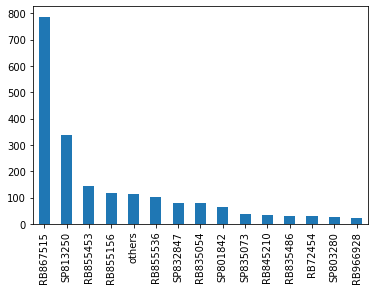

In [ ]:
# Gráfico de barras apresentando a distribuição do número de talhões por variedade
df.variedade.value_counts().plot.bar();

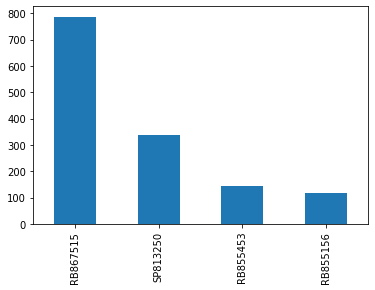

In [ ]:
# Idem acima apenas para as quatro variedades mais frequentes
df.variedade.value_counts()[0:4].plot.bar();

### Gráfico de pontos (scatter) das produtividades por número de corte

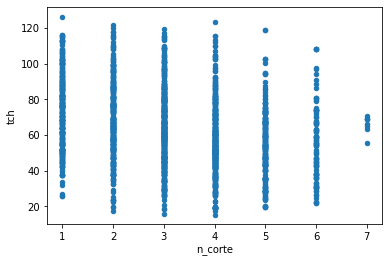

In [ ]:
# Gráfico de pontos (scatter) das produtividades por estágio de corte
df.plot.scatter(x='n_corte',y='tch');

### Gráfico (boxplot) da produtividade

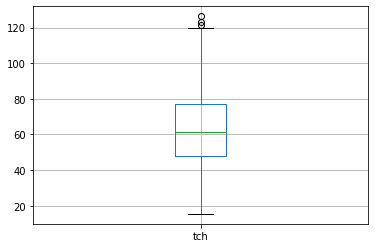

In [ ]:
# Gráfico (boxplot) da produtividade (todos estágios, todas as variedades, etc.)
df.boxplot(column='tch');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


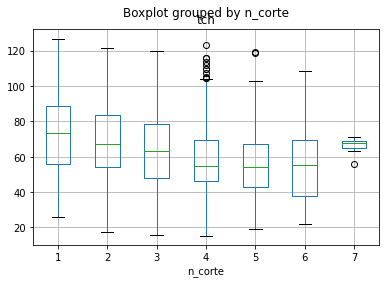

In [ ]:
# Gráfico (boxplot) da produtividade, separado por número de corte (todas as variedades)
df.boxplot(column='tch',by='n_corte');

# Fazer algumas alterações no conjunto de dados ANTES de construir um modelo


## Excluir registros com número de corte 6 e 7


In [ ]:
# Excluir os registros com número de corte 6 e 7
df=df.drop(df[df.n_corte>=6].index) #só traz as linhas ondem o ncorte>=6 e faz o drop delas, o index refere-se as linhas que seguem esses critérios

## Considerar apenas as quatro variedades mais frequentes e excluir as demais


In [ ]:
df.n_corte.value_counts() 

3    527
4    449
2    362
1    313
5    238
Name: n_corte, dtype: int64

In [ ]:
df.variedade.value_counts()

RB867515    732
SP813250    319
RB855453    139
RB855156    118
others      105
RB855536    101
SP832847     81
RB835054     76
SP801842     62
SP835073     33
RB845210     30
RB835486     25
RB72454      25
RB966928     22
SP803280     21
Name: variedade, dtype: int64

In [ ]:
reter= df.variedade.value_counts()[0:4].index.tolist()
df=df[df.variedade.isin(reter)] #traz as linhas com as 4 primieras variedades

In [ ]:
df.shape

(1308, 13)

# One-Hot-Encode com atributos categóricos (tipo 'object')


In [ ]:
# Verificar tipos de variáveis do DataFrame
df.dtypes

In [ ]:
# One-Hot-Encode com atributos 'Variedade' e 'Solo' (Usar Pandas get_dummies)

# Criar lista com os atributos que sofrerão a transformação
atrib_ohe = ['variedade', 'solo']

# Criar um DataFrame auxiliar (terá apenas os atributos OHE)
dfaux = pd.get_dummies(df[atrib_ohe])

In [ ]:
dfaux.head()

In [ ]:
# Juntar (concatenar) o DataFrame original (df) e o recem criado (dfaux)
df=pd.concat([df,dfaux], axis=1)

In [ ]:
# Verificar primeiras linhas
df.head()

In [ ]:
# Considerando que NÃO HÁ MAIS NECESSIDADE dos atributos 'variedade' e 'solo', vamos exclui-los
df=df.drop(['variedade','solo'],axis=1)

In [ ]:
# Qual a dimensionalidade (linhas,colunas) do novo conjunto de dados?
df.shape

# Construção do Modelo (KNN p/ Regressão)


## Dividir Conjunto de dados em Treino/Teste na proporção 70/30 (random_state = 2021)

In [ ]:
# Separar atributos preditores(X) do atributo meta (y)
y = df.tch
X = df.drop(['tch'],axis=1)

# Criar X_train, X_test, y_train, y_test com as proporções 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2021, stratify=y)

In [ ]:
X_test.head()

,std_iii,stn_iii,std_ii,stn_ii,std_i,stn_i,ppt_i,ppt_ii,ppt_iii,n_corte,variedade_RB855156,variedade_RB855453,variedade_RB867515,variedade_SP813250,solo_LP,solo_O,solo_R
1921,301.950512,289.762078,302.467955,293.188604,307.708694,291.613896,72.3,1344.9,18.9,3,0,0,0,1,1,0,0
1127,304.523008,291.795044,303.500436,292.934377,311.027630,293.516988,380.8,841.7,174.5,4,0,0,0,1,0,0,1
813,298.900374,289.463857,304.860374,292.754017,302.916737,290.645675,167.1,1234.5,78.0,1,0,0,1,0,0,0,1
1837,300.441660,292.183146,307.461054,293.835073,300.052923,287.755217,288.0,866.5,345.6,5,0,0,1,0,1,0,0
1577,298.681785,289.799237,304.794941,294.808863,311.198149,292.306510,230.8,889.6,390.7,4,0,1,0,0,1,0,0


## Normalizar os atributos numéricos

In [ ]:
# Verificar se há necessidade de normalizar. 
# Têm escalas muito diferentes?
df.describe()

,std_iii,stn_iii,std_ii,stn_ii,std_i,stn_i,ppt_i,ppt_ii,ppt_iii,n_corte,tch,variedade_RB855156,variedade_RB855453,variedade_RB867515,variedade_SP813250,solo_LP,solo_O,solo_R
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,301.477524,290.845847,303.822749,292.714545,305.231572,290.794500,270.912309,1033.257416,274.015367,3.071101,62.832416,0.090214,0.106269,0.559633,0.243884,0.473242,0.022936,0.503823
std,3.069252,1.835666,2.590952,1.272012,3.295159,2.363089,210.401912,300.849621,180.136814,1.257993,20.228332,0.286598,0.308300,0.496621,0.429588,0.499474,0.149756,0.500177
min,294.781429,285.114347,298.069668,288.183780,296.887806,284.645217,8.800000,252.500000,10.900000,1.000000,15.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.386371,289.697163,301.564640,291.823829,302.687172,288.902192,99.900000,820.325000,126.225000,2.000000,49.127500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.840161,290.798472,303.590783,292.770127,305.546667,290.413599,215.250000,1007.200000,243.000000,3.000000,61.690000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,303.212588,292.100462,305.755009,293.671316,307.904097,292.715542,386.450000,1230.275000,381.200000,4.000000,76.155000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,311.293606,295.458620,312.077846,295.670252,312.720222,296.812000,1052.700000,2162.800000,950.200000,5.000000,123.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Normalizar Z-score (Média 0 e Desvio Padrão 1). Usar sklearn.preprocessing StandardScaler (já importado no início do script)
# Fazer a normalização no conjunto de treino (X_train) e usar a mesma 'transformação' no conjunto de teste (X_teste)
# Passo 1: Definir o 'scaler' no X_train
scaler = StandardScaler().fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# Passo 2: Usar no X_test a mesma operação feita para a normalização de X_train
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Otimizar Hiperparâmetro K

### GridSearch CV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors': np.arange(7,16)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_gsearch = GridSearchCV(KNeighborsRegressor(),
                           param_grid=faixa_K,
                           cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_gsearch.fit(X_train_norm, y_train)

# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_gsearch.best_params_
print(opt_K)

{'n_neighbors': 10}
CPU times: user 404 ms, sys: 334 ms, total: 738 ms
Wall time: 391 ms


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn = KNeighborsRegressor(n_neighbors=opt_K['n_neighbors']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred =knn.predict(X_test_norm)

# Passo 3: Avaliar o modelo, calculando R2, MAE e RMSE
r2_knn = r2_score(y_test,y_pred)
mae_knn = mean_absolute_error(y_test,y_pred)
rmse_knn = np.sqrt(mean_absolute_error(y_test,y_pred))

print('R2 = ',r2_knn)
print('MAE = ', mae_knn)
print('RMSE = ', rmse_knn)


R2 =  0.2815415738047884
MAE =  13.459722646310434
RMSE =  3.6687494662773625
CPU times: user 20.2 ms, sys: 5.04 ms, total: 25.2 ms
Wall time: 19 ms


In [ ]:
# A título de comparação, vamos utilizar o 'Dummy Regressor' do Scikit-learn
from sklearn.dummy import DummyRegressor
# Importar 'DummyRegressor' do componente 'dummy' do sklearn


In [ ]:
# Criar objeto definindo estratégia para estimativa e ajustar ao conjunto de treino
dummy= DummyRegressor(strategy='mean').fit(X_train_norm,y_train)

# Fazer a predição no conjunto de teste utilizando o objeto definido e ajustado anteriormente
y_pred_dummy = dummy.predict(X_test_norm)

# Avaliar a estimativa feita com 'dummy' (R2, MAE e RMSE)
r2_dummy = r2_score(y_test,y_pred_dummy)
mae_dummy = mean_absolute_error(y_test,y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test,y_pred_dummy))

print('R2_dummy = ',r2_dummy)
print('MAE_dummy = ', mae_dummy)
print('RMSE_dummy = ', rmse_dummy)


R2_dummy =  -0.0044371357107857445
MAE_dummy =  15.918614274392024
RMSE_dummy =  19.915239000588326


### Randomized Search CV

In [ ]:
from pandas.core.common import random_state
# Cronometrar o tempo de execução

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar e o número desejado de iterações
faixa_K ={'n_neighbors':np.arange(1,42)} #vai do 1 ao 41, de 1 em 1, fará isso em:
niter = 15                                #15 vezes

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_rsearch = RandomizedSearchCV(KNeighborsRegressor(),
                                 param_distributions=faixa_K,
                                 n_iter=niter,
                                 cv=5,
                                 random_state=2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados

knn_rsearch.fit(X_train_norm,y_train)
# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_rsearch.best_params_
print(opt_K)

{'n_neighbors': 10}


# ATIVIDADE PRÁTICA

## Conjunto de dados: FA084-1s2021-Dataset-UCR.csv
(Conjunto de dados de produção da Usina Costa Rica, do Grupo ATVOS)

Descrição dos atributos:

*  **safra:**  Ano da Safra (Plantio/Colheita): 21213 (2012/2013), 21314 (2013/2014), etc.  
*  **codFaz:**  Código da Fazenda onde se realizou a colheita

* **bloco:**  Bloco onde se realizou a colheita 
* **talhão:**  Talhão onde se realizou a colheita 
* **estagio:**  Número de corte da colheita: 1° corte (12m, 15M e 18m), 2° corte, 3° corte, etc 
* **variedade:**  Variedade da cana 
* **usina:**  Código da Usina 
* **ambProd:**  Ambiente de Produção do talhão 
* **tchEst:**  Produtividade (TCH – t/ha) ESTIMADA do talhão 
* **tchReal:**  Produtividade (TCH – t/ha) REAL do talhão 
* **days:**  Intervalo (em dias) entre a última colheita e a colheita anterior



## 1) Adequação do Conjunto de Dados

In [ ]:
df1=pd.read_csv('/content/FA084-1s2021-Dataset-UCR.csv')
df1


In [ ]:
df1.drop(columns=(df1.iloc[:,0:1]),inplace=True)

In [ ]:
df1.dtypes

### 1.A) Mantenha apenas os dados das **QUATRO SAFRAS** COM MAIOR NÚMERO DE REGISTROS, DESCARTANDO OS DEMAIS REGISTROS

In [ ]:
c_safra= df1.safra.value_counts()[:4].index.tolist()
df1=df1[df1.safra.isin(c_safra)]

In [ ]:
df1.safra.value_counts()

### 1.B) Mantenha apenas os dados das **TRÊS VARIEDADES** COM MAIOR NÚMERO DE REGISTROS, DESCARTANDO OS DEMAIS REGISTROS

In [ ]:
varie=df1.variedade.value_counts()[:3].index.tolist()
df1=df1[df1.variedade.isin(varie)]
df1.variedade.value_counts()

RB867515    1765
SP813250     745
RB855453     524
Name: variedade, dtype: int64

### 1.C) ESTÁGIOS (NÚMERO DE CORTES)

#### 1.C.1) 

> Estágios ‘12m’, ‘15M’ e ‘18m’ são CANA PLANTA (1° corte).  
O que os diferencia é que são cana de  12 meses, 15 meses ou 18 meses.  
Para que todos esses registros sejam **‘cana de primeiro corte’**, considere todos como **estágio ‘1’**. 


In [ ]:
lista=['12m','15M','18m']
for k in lista: 
  df1.estagio.replace({k:1}, inplace=True)
df1.estagio.value_counts()

#### 1.C.2) 

> Mantenha apenas os dados dos registros dos **CINCO PRIMEIROS CORTES** (cortes de 1 a 5), DESCARTANDO OS DEMAIS REGISTROS


In [ ]:
df1=df1.drop(df1[df1.estagio.astype(int)>=6].index)
df1.estagio.value_counts()

## 2. Exploração Inicial do Conjunto de Dados

### 2.A) Qual a média de Produtividade Real da cana para cada estágio de corte?

In [ ]:
df1.tchReal.groupby(df1.estagio).mean()

### 2.B) Qual a média de Produtividade Real da cana para cada variedade?

In [ ]:
df1.tchReal.groupby(df1.variedade).mean()

### 2.C) Construa um 'Boxplot' da Produtividade Real da cana para cada estágio de corte

In [ ]:
df1.boxplot(column='tchReal',by='estagio');

### 2.D) Construa um 'Boxplot' da Produtividade Real da cana para cada variedade

In [ ]:
df1.boxplot(column='tchReal',by='variedade');

## 3. Análise do Erro da Produtividade Estimada

### 3.A) Faça uma análise crítica dos resultados obtidos com as figuras solicitadas a seguir:

*   Histograma dos erros entre as produtividades estimada (tchEst) e real (tchReal)  
  * Geral
  * Por variedade
  * Por estágio (número de corte)
*    Gráfico ‘scatter’ comparando tchReal (eixo x) e tchEst (eixo y)



In [ ]:
df1['Erro']=df1.tchEst-df1.tchReal

In [ ]:
df1.hist(column='Erro');

In [ ]:
df1.hist(column='Erro', by='variedade', figsize=(10,10));

In [ ]:
df1.hist(column='Erro', by='estagio', figsize=(10,10));

In [ ]:
df1.plot.scatter(x='tchReal', y='tchEst');

### 3.B) Faça uma análise crítica dos resultados obtidos com os itens a seguir:

*    Valores da produtividade estimada e real, quando o erro foi máximo  
*    Estágio (número do corte) e variedade quando o erro foi máximo  
*    Produtividade real média, máxima e mínima para esta variedade neste corte



In [ ]:
df1[df1.Erro==df1.Erro.max()]

,safra,codFaz,bloco,talhao,estagio,variedade,usina,ambProd,tchEst,tchReal,days,Erro
3297,21516,430045,1,17,4,RB855453,COR,B,122.75,2.44,387,120.31


In [ ]:
df1[abs(df1.Erro)==abs(df1.Erro.max())][['tchReal','tchEst','Erro','variedade','estagio']]

,tchReal,tchEst,Erro,variedade,estagio
3297,2.44,122.75,120.31,RB855453,4


In [ ]:
kmaxesta=df1[abs(df1.Erro)==abs(df1.Erro.max())]['estagio']
kmaxvarie=df1[abs(df1.Erro)==abs(df1.Erro.max())]['variedade']
kmaxesta=kmaxesta.astype(int)


In [ ]:
kminesta=df1[abs(df1.Erro)==abs(df1.Erro.min())]['estagio']
kminesta=kminesta.astype(int)
kminvarie=df1[abs(df1.Erro)==abs(df1.Erro.min())]['variedade']

In [ ]:
#df1.loc[df1['ClusterID'].isin(df2['ClusterID'])]
#Both df1['ClusterID'] & df2['ClusterID'] are series. Equating two series within loc method will throw the exception. 
#Instead, calling isin method will give bool outputs and hence for all True values you will get the corresponding output with loc method.
#PESQUISEI PQ TAVA TENTANDo FAZER DF1['ESTAGIO']==KMAXESTA, MAS NÃO PODE PELA EXPLICAÇÃO
df1.tchReal.where(df1['estagio'].astype(int).isin(kmaxesta) & df1['variedade'].isin(kmaxvarie)).mean()


81.67382022471911

In [ ]:
df1.tchReal.where(df1['estagio'].astype(int).isin(kminesta) & df1['variedade'].isin(kminvarie)).mean()

68.42534117647057

### 3.C) Faça uma análise crítica dos resultados obtidos com as figuras solicitadas:

*  Gráfico 'scatter' com estagio de corte (eixo x) e tchErro (eixo y)  
*  Gráfico 'scatter' com variedade (eixo x) e tchErro (eixo y)  
*  Gráfico 'scatter' com safra (eixo x) e tchErro (eixo y)  
*  Gráfico 'scatter' com ambProd (eixo x) e tchErro (eixo y)  



In [ ]:
df1['estagio']=df1['estagio'].astype(str)
df1.plot.scatter(x='estagio', y='Erro');
df1.plot.scatter(x='variedade', y='Erro');
df1.plot.scatter(x='safra', y='Erro');
df1.plot.scatter(x='ambProd', y='Erro');

## 4. Modelagem e Avaliação dos Resultados

### Considere o conjunto de dados: FA084-1s2021-Dataset-UCR.csv COM TODAS AS ALTERAÇÕES REALIZADAS ANTERIORMENTE

### INSTRUÇÕES GERAIS:
* SEMPRE QUE PERTINENTE, utilizar random_state = 2021  

* SEMPRE QUE PERTINENTE, transformar variáveis categóricas em numéricas  
OBS: Você deve escolher que método utilizar: One-Hot-Encode ou Label Encode

* SEMPRE QUE PERTINENTE, normalizar as variáveis numéricas (você escolhe o tipo de normalização)

* SEMPRE OTIMIZAR os hiperparâmetros  
OBS: Você deve escolher como otimizar (GridSearchCV ou RandomizedSearchCV) e quais parâmetros otimizar, indicando a faixa (range) escolhida e o valor ótimo obtido.

* SEMPRE CRIAR CONJUNTO DE TREINO e TESTE com PROPORÇÃO 70/30 (e ESTRATIFICADO pelo atributo meta, se for um problema de Classificação).

* SEMPRE AVALIAR o modelo no CONJUNTO DE TESTE  
  * Se Problema de Regressão, avaliar usando as métricas R2, MAE e RMSE  
  * Se Problema de Classificação, construir a Matriz de Confusão e apresentar o relatório com Acurácia Geral, Precision, Recall e F1-score.

In [ ]:
# No One-Hot Enconde temos que por todos os categoricos como numericos (int, float etc)
df1.dtypes

safra          int64
codFaz         int64
bloco          int64
talhao         int64
estagio       object
variedade     object
usina         object
ambProd       object
tchEst       float64
tchReal      float64
days           int64
Erro         float64
dtype: object

In [ ]:
# Criar lista com os atributos que sofrerão a transformação
df1.codFaz= df1.codFaz.astype(str)
df1.bloco= df1.bloco.astype(str)
df1.talhao= df1.talhao.astype(str)
df1.safra= df1.safra.astype(str)
atrib_ohe = ['estagio','variedade','talhao','codFaz','bloco','safra', 'usina','ambProd']

# Criar um DataFrame auxiliar (terá apenas os atributos OHE)
dfaux = pd.get_dummies(df1[atrib_ohe])

In [ ]:
dfaux.head()

,estagio_1,estagio_2,estagio_3,estagio_4,estagio_5,variedade_RB855453,variedade_RB867515,variedade_SP813250,talhao_1,talhao_10,...,safra_21516,usina_COR,ambProd_A,ambProd_ADEF,ambProd_B,ambProd_C,ambProd_D,ambProd_E,ambProd_F,ambProd_G
0,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Juntar (concatenar) o DataFrame original (df) e o recem criado (dfaux)
df1=pd.concat([df1,dfaux], axis=1)

In [ ]:
# Verificar primeiras linhas
df1.head()

,safra,codFaz,bloco,talhao,estagio,variedade,usina,ambProd,tchEst,tchReal,...,safra_21516,usina_COR,ambProd_A,ambProd_ADEF,ambProd_B,ambProd_C,ambProd_D,ambProd_E,ambProd_F,ambProd_G
0,21213,430001,1,1,4,RB855453,COR,B,60.0,56.30,...,0,1,0,0,1,0,0,0,0,0
1,21213,430001,1,2,4,SP813250,COR,B,80.0,75.07,...,0,1,0,0,1,0,0,0,0,0
2,21213,430001,1,3,4,SP813250,COR,B,80.0,74.95,...,0,1,0,0,1,0,0,0,0,0
3,21213,430001,1,4,4,SP813250,COR,B,80.0,72.89,...,0,1,0,0,1,0,0,0,0,0
10,21213,430001,1,10,4,RB855453,COR,B,60.0,56.29,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Considerando que NÃO HÁ MAIS NECESSIDADE dos atributos 'variedade' e 'solo', vamos exclui-los
df1=df1.drop(['estagio','variedade','talhao','codFaz','bloco','safra', 'usina','ambProd','Erro'],axis=1)

In [ ]:
df1

,tchEst,tchReal,days,estagio_1,estagio_2,estagio_3,estagio_4,estagio_5,variedade_RB855453,variedade_RB867515,...,safra_21516,usina_COR,ambProd_A,ambProd_ADEF,ambProd_B,ambProd_C,ambProd_D,ambProd_E,ambProd_F,ambProd_G
0,60.00,56.30,412,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,80.00,75.07,412,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,80.00,74.95,407,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,80.00,72.89,402,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10,60.00,56.29,412,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,57.72,53.85,389,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4061,57.72,53.84,389,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4062,57.72,53.73,389,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4063,57.72,52.96,389,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1


### 4.A) Usando KNN, construir um Modelo de Regressão para predizer a Produtividade Real

In [ ]:
y=df1.tchReal
X=df1.drop(['tchReal'], axis=1)

In [ ]:
X.head()

,tchEst,days,estagio_1,estagio_2,estagio_3,estagio_4,estagio_5,variedade_RB855453,variedade_RB867515,variedade_SP813250,...,safra_21516,usina_COR,ambProd_A,ambProd_ADEF,ambProd_B,ambProd_C,ambProd_D,ambProd_E,ambProd_F,ambProd_G
0,60.0,412,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,80.0,412,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,80.0,407,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,80.0,402,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
10,60.0,412,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
y.head()

0     56.30
1     75.07
2     74.95
3     72.89
10    56.29
Name: tchReal, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y.iloc[:,1], test_size=0.3, random_state=2021, stratify=y.iloc[:,1])

IndexingError: ignored

In [ ]:
X_test.head()

NameError: ignored

In [ ]:
y_test.head()

414     40.15
3583    45.50
1840    79.70
3086    73.13
3400    69.71
Name: tchReal, dtype: float64

In [ ]:
scaler=StandardScaler().fit(X_train)
X_train_norma=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_norm=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
faixak={'n_neighbors':np.arange(5,7)}
knn_gsearch=GridSearchCV(KNeighborsRegressor(),
                         param_grid=faixak,
                         cv=5)
knn_gsearch.fit(X_train_norma,y_train)
optk=knn_gsearch.best_params_
print(optk)

{'n_neighbors': 6}


In [ ]:
knn= KNeighborsRegressor(n_neighbors=optk['n_neighbors']).fit(X_train_norma, y_train)
y_pred=knn.predict(X_test_norm)
r2_knn=r2_score(y_test,y_pred)
mae_knn=mean_absolute_error(y_test,y_pred)
rmse_knn=np.sqrt(mean_squared_error(y_test,y_pred))

print('R2= ',r2_knn)
print('MAE= ',mae_knn)
print('RMSE= ',rmse_knn)


R2=  0.4676752088937296
MAE=  14.038879375951295
RMSE=  20.747403234128804


### 4.B) 

* Criar y_dummy utilizando o 'Dummy Regressor' do Scikit-learn (média)  
* Calcular R2, MAE e RMSE para os erros    
  * Do modelo (y_pred)
  * Da estimativa (tchEst)
  * Do 'Dummy' (y_dummy)

* Fazer uma ANÁLISE CRÍTICA dos resultados

In [ ]:
from sklearn.dummy import DummyRegressor
dummy=DummyRegressor(strategy='mean').fit(X_train, y_train)
y_pred_dummy=dummy.predict(X_test_norm)
r2_dummy=r2_score(y_test, y_pred_dummy)
mae_dummy=mean_absolute_error(y_test, y_pred_dummy)
rmse_dummy= np.sqrt(mean_squared_error(y_test, y_pred_dummy))
print('R2_dummy = ',r2_dummy)
print('MAE_dummy = ', mae_dummy)
print('RMSE_dummy = ', rmse_dummy)

R2_dummy =  -0.0013953784627156463
MAE_dummy =  22.351629691993253
RMSE_dummy =  28.456284417239818


In [ ]:
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar e o número desejado de iterações
faixa_K = {"n_neighbors":np.arange(1,40)}
niter = 15

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_rsearch = RandomizedSearchCV(KNeighborsRegressor(),
                                 param_distributions = faixa_K,
                                 n_iter = niter,
                                 cv = 5,
                                 random_state = 2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_rsearch.fit(X_train_norma, y_train)

# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_rsearch.best_params_
print(opt_K)

{'n_neighbors': 5}
CPU times: user 3.98 s, sys: 2.1 s, total: 6.08 s
Wall time: 3.17 s


In [ ]:
# R2, MAE e RMSE para os erros

# Do modelo (y_pred)
print('R2 = ',r2_knn)
print('MAE = ', mae_knn)
print('RMSE = ', rmse_knn)
print("\n")

# Da estimativa (tchEst)
r2_est = r2_score(X_test.tchEst, y_pred)
mae_est = mean_absolute_error(X_test.tchEst, y_pred)
rmse_est = np.sqrt(mean_squared_error(X_test.tchEst, y_pred))

print('R2_est = ',r2_est)
print('MAE_est = ', mae_est)
print('RMSE_est = ', rmse_est)
print("\n")

# Do 'Dummy' (y_dummy)
print('R2_dummy = ',r2_dummy)
print('MAE_dummy = ', mae_dummy)
print('RMSE_dummy = ', rmse_dummy)

R2 =  0.4676752088937296
MAE =  14.038879375951295
RMSE =  20.747403234128804


R2_est =  0.3933520630655014
MAE_est =  13.177456240487064
RMSE_est =  17.66351624836748


R2_dummy =  -0.0013953784627156463
MAE_dummy =  22.351629691993253
RMSE_dummy =  28.456284417239818


### 4.C) 

*  Construir os seguintes gráficos ‘scatter’, tendo sempre tchReal no eixo x:  
  * tchReal x y_pred  
  * tchReal x tchEst
  * tchReal x y_dummy

* Fazer uma ANÁLISE CRÍTICA dos resultados

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace=True)
y_test= y_test.drop(columns={"index","level_0"},axis=1)
y_test.head()


,tchReal
0,40.15
1,45.50
2,79.70
3,73.13
4,69.71


In [ ]:
y_pred= pd.DataFrame(y_pred)
y_pred.rename(columns={0:'y_pred'}, inplace= True)
y_pred

,y_pred
0,60.755000
1,52.418333
2,103.303333
3,93.251667
4,67.060000
...,...
871,41.960000
872,94.671667
873,73.100000
874,23.115000


In [ ]:
dfy = pd.concat([y_test, y_pred], axis = 1)
dfy

,tchReal,y_pred
0,40.15,60.755000
1,45.50,52.418333
2,79.70,103.303333
3,73.13,93.251667
4,69.71,67.060000
...,...,...
871,49.64,41.960000
872,74.03,94.671667
873,89.67,73.100000
874,27.69,23.115000


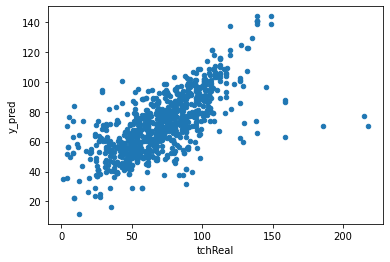

In [ ]:
dfy.plot.scatter(x='tchReal',y='y_pred');